In [43]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import random

In [45]:
data = pd.read_csv('Companies.csv')

In [46]:
# Step 2: Gabungkan teks dari kolom 'headquarters' dan 'industry'
# Pastikan bahwa data di kolom tersebut tidak ada yang kosong (null)
text_headquarters = ' '.join(data['Headquarters'].dropna().astype(str))  # Gabungkan semua teks di 'headquarters'
text_industry = ' '.join(data['Industry'].dropna().astype(str))  # Gabungkan semua teks di 'industry'

In [47]:
# Fungsi untuk menghasilkan warna acak yang lebih jelas
def random_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return f"hsl({random.randint(0, 360)}, 100%, 50%)"  # Menghasilkan warna HSL acak

In [48]:
wordcloud_headquarters = WordCloud(
    width=800, 
    height=400,
    background_color='white',  # Latar belakang putih
    max_words=200,  # Maksimal kata yang ditampilkan
    contour_color='steelblue',  # Warna kontur
    color_func=random_color_func  # Menggunakan warna acak
).generate(text_headquarters)

In [49]:
wordcloud_industry = WordCloud(
    width=800, 
    height=400,
    background_color='white',  # Latar belakang putih
    max_words=200,  # Maksimal kata yang ditampilkan
    contour_color='steelblue',  # Warna kontur
    color_func=random_color_func  # Menggunakan warna acak
).generate(text_industry)

In [50]:
# Step 4: Membuat distribusi frekuensi untuk diagram batang
headquarters_words = text_headquarters.split()
industry_words = text_industry.split()
# Menghitung frekuensi kata
headquarters_freq = Counter(headquarters_words)
industry_freq = Counter(industry_words)
# Dapatkan kata-kata yang paling umum untuk diagram batang (10 teratas)
headquarters_common = headquarters_freq.most_common(20)
industry_common = industry_freq.most_common(20)

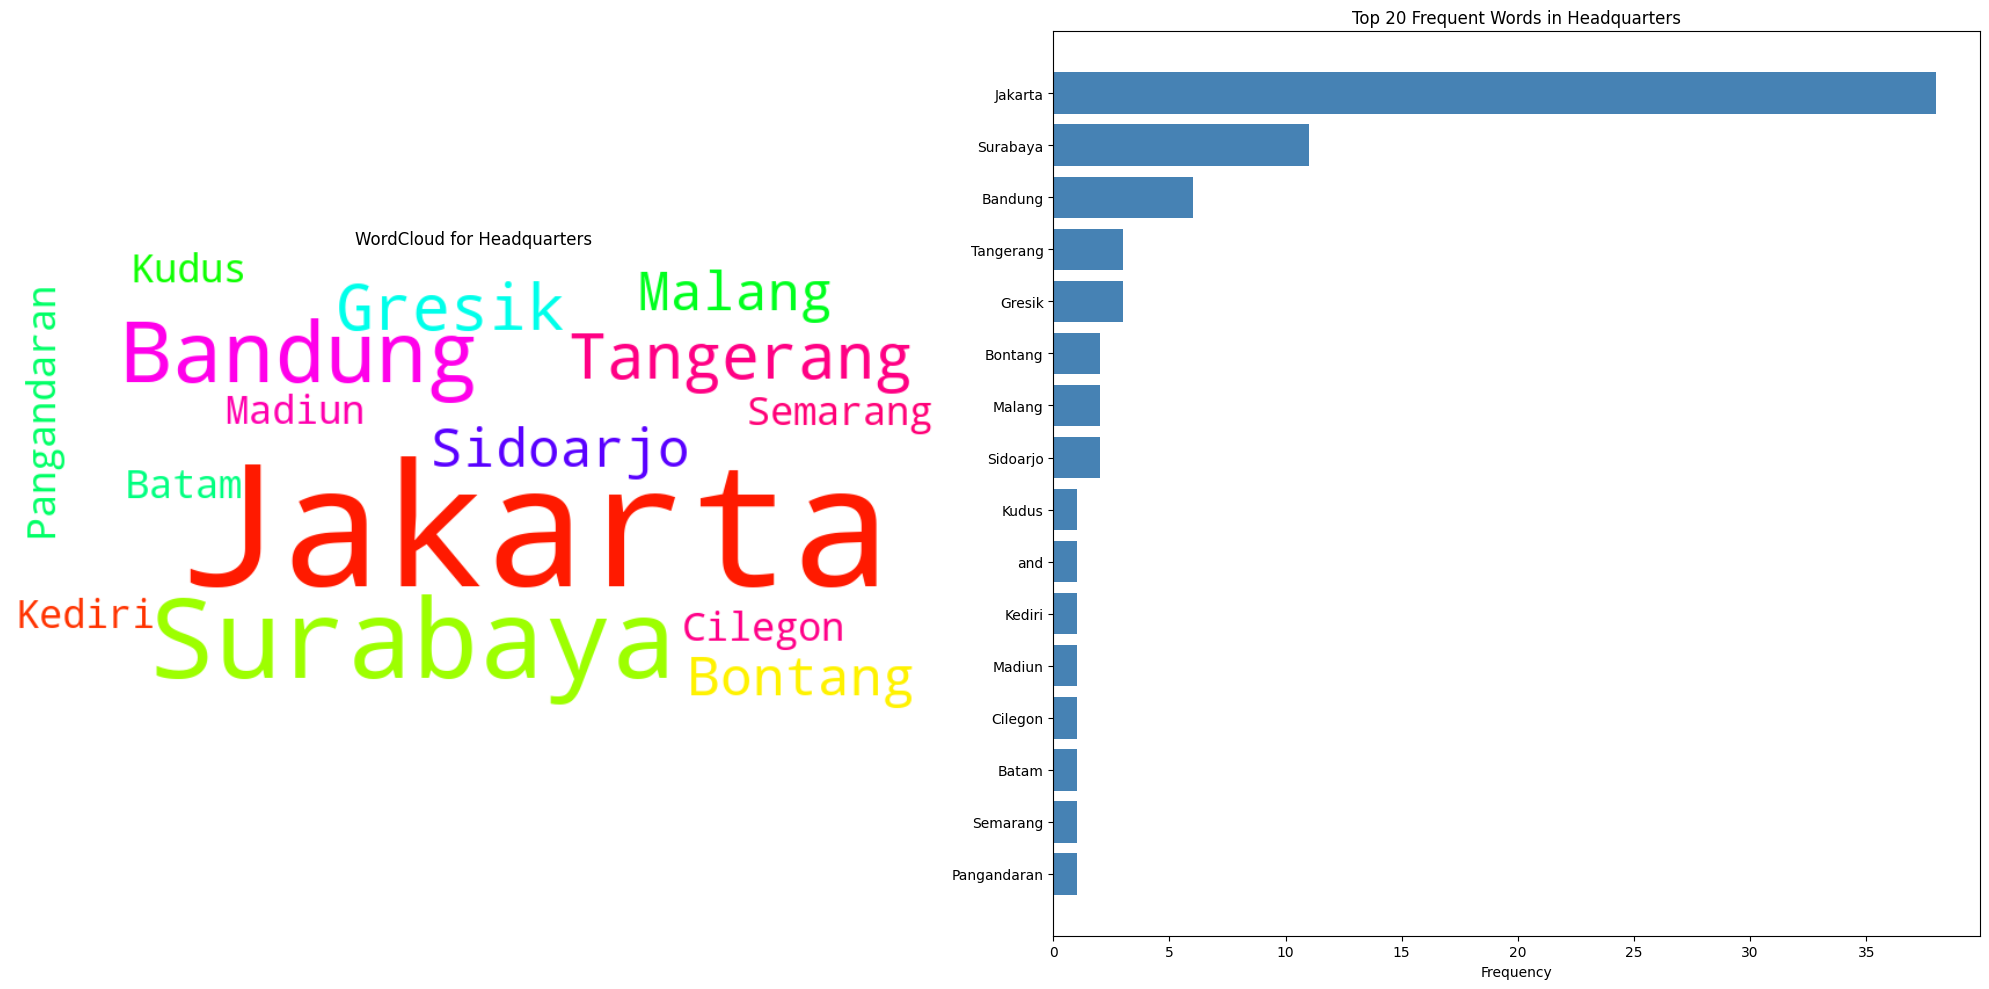

In [51]:
# Step 5: Plot WordCloud dan bagan batang secara berdampingan
fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # 1 row, 2 columns

# Plot WordCloud untuk Kantor Pusat
axs[0].imshow(wordcloud_headquarters, interpolation='bilinear')
axs[0].axis('off')  # Remove axis for the WordCloud
axs[0].set_title("WordCloud for Headquarters")

# Plot Bar Chart untuk Kantor Pusat
headquarters_words, headquarters_counts = zip(*headquarters_common)
axs[1].barh(headquarters_words, headquarters_counts, color='steelblue')
axs[1].set_title("Top 20 Frequent Words in Headquarters")
axs[1].set_xlabel("Frequency")
axs[1].invert_yaxis()  # kata tertinggi berada di bagian atas

plt.tight_layout()
plt.show()

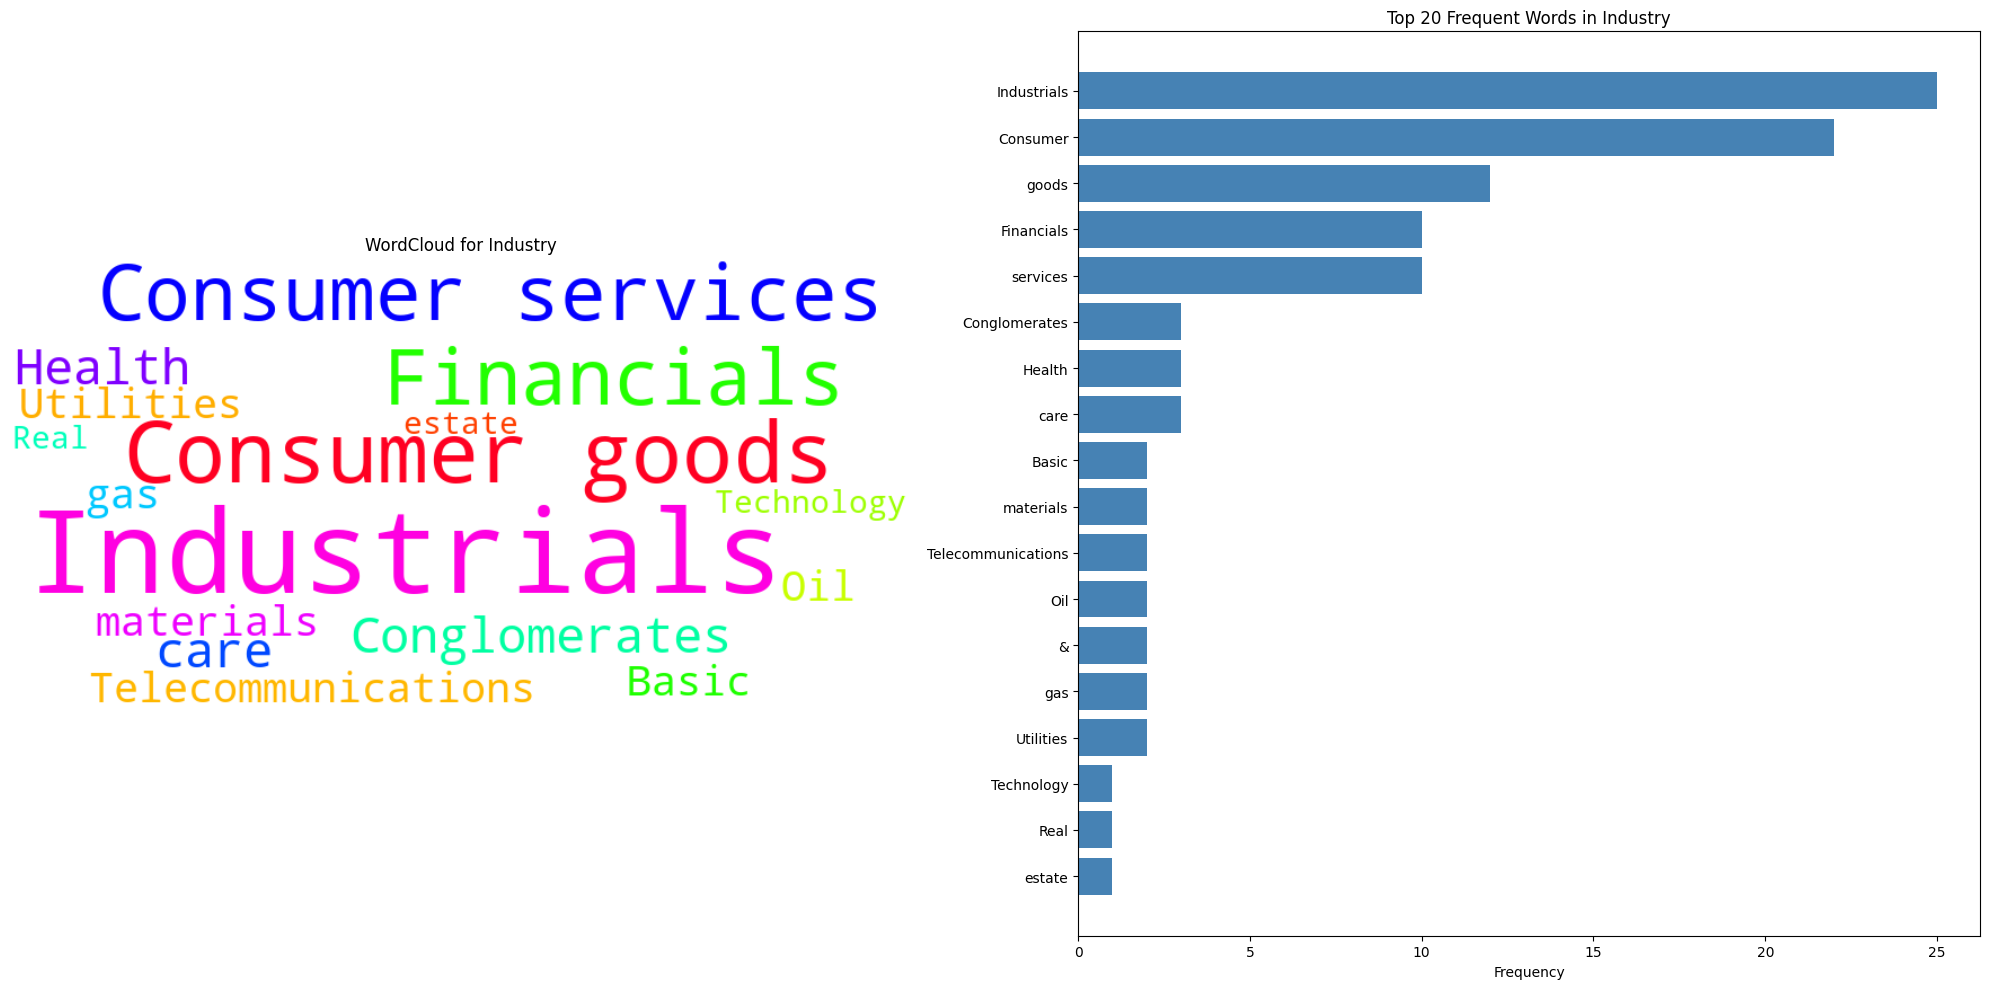

In [52]:
# Step 6: Plot WordCloud dan diagram batang untuk Industri
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot WordCloud untuk industri
axs[0].imshow(wordcloud_industry, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title("WordCloud for Industry")

# Plot Bar Chart untuk industri
industry_words, industry_counts = zip(*industry_common)
axs[1].barh(industry_words, industry_counts, color='steelblue')
axs[1].set_title("Top 20 Frequent Words in Industry")
axs[1].set_xlabel("Frequency")
axs[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [53]:
# Step 7: Menyimpan gambar WordCloud dan diagram batang secara opsional ke file
wordcloud_headquarters.to_file('wordcloud_headquarters.png')
wordcloud_industry.to_file('wordcloud_industry.png')